## 1: Import all the required library


### Import all the libraries that are required for EDA.

In [1]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# import squarify
import plotly.express as px
# for plotting on world map 
from plotly.express import scatter_geo
import sys
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
#creating the function which will read csv files from the local drive after calling and passing the path of the file.
def read_csv(path):
    return pd.read_csv(path)


In [3]:
#reading the dataset from the local drive by calling the function read_csv(). 
# and also printing first five rows of the dataframe.

earthquake_data = read_csv('../dataset/final_dataset/raw_dataset.csv')

earthquake_data.head(5)

,Unnamed: 0.1,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,distance,url,gravity,force
0,0,20,2011-01-01 09:56:58,-26.803,-63.136,576.8,7.00,mww,607.0,18.4,NaN,0.85,us,usp000hsdc,2022-10-24T02:25:20.934Z,"26 km NNE of El Hoyo, Argentina",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,380543,https://geodesy.noaa.gov/api/gravd/gp?lat=-26....,9.818623,2.021809e+20
1,1,21,2011-01-01 09:59:36,-26.851,-63.217,592.9,5.78,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16394566,2022-04-08T21:40:35.688Z,"19 km N of El Hoyo, Argentina",earthquake,NaN,25.0,0.4,NaN,reviewed,iscgem,iscgem,380548,https://geodesy.noaa.gov/api/gravd/gp?lat=-26....,9.794050,2.021755e+20
2,2,76,2011-01-02 09:23:13,-59.414,-24.469,35.0,5.10,mb,52.0,95.5,NaN,1.20,us,usp000hsez,2014-11-07T01:43:20.059Z,South Sandwich Islands region,earthquake,NaN,NaN,NaN,13.0,reviewed,us,us,383580,https://geodesy.noaa.gov/api/gravd/gp?lat=-59....,9.793398,1.989920e+20
3,3,92,2011-01-02 15:19:31,-4.458,101.428,21.6,5.70,mwb,271.0,28.9,NaN,1.08,us,usp000hsfe,2022-04-08T21:28:10.812Z,"118 km SW of Bengkulu, Indonesia",earthquake,NaN,3.2,NaN,NaN,reviewed,us,us,384394,https://geodesy.noaa.gov/api/gravd/gp?lat=-4.4...,9.802458,1.981501e+20
4,4,103,2011-01-02 20:20:17,-38.355,-73.326,24.0,7.20,mww,397.0,30.1,NaN,1.10,us,usp000hsfq,2022-08-09T03:48:09.579Z,"42 km NNW of Carahue, Chile",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,385093,https://geodesy.noaa.gov/api/gravd/gp?lat=-38....,9.790649,1.974314e+20


In [4]:
# # Shape is the method which shows the dimension of the dataFrame.
earthquake_data.shape


(18059, 28)

In [5]:
#Droping the 'Unnamed 0' column this is index which was created while concatenating several csv datasets.
earthquake_data = earthquake_data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [6]:
# The total entries in the dataset, both missing and present values of the dataframe.
earthquake_data.size

469534

In [7]:
# Total memory occupied and datatypes present in DataFrame.
# sys.getsizeof(earthquake_data)
earthquake_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18059 entries, 0 to 18058
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18059 non-null  object 
 1   latitude         18059 non-null  float64
 2   longitude        18059 non-null  float64
 3   depth            18059 non-null  float64
 4   mag              18059 non-null  float64
 5   magType          18059 non-null  object 
 6   nst              6873 non-null   float64
 7   gap              17816 non-null  float64
 8   dmin             13823 non-null  float64
 9   rms              17850 non-null  float64
 10  net              18059 non-null  object 
 11  id               18059 non-null  object 
 12  updated          18059 non-null  object 
 13  place            18059 non-null  object 
 14  type             18059 non-null  object 
 15  horizontalError  12645 non-null  float64
 16  depthError       15863 non-null  float64
 17  magError    

In [8]:
# Creating a dictionary to rename columns for better understanding the dataset. And checking for the name correction, upper-lower case correction etc.
col = {'time':'date_time',
     'latitude' :'latitude',
     'longitude':'longitude',
     'depth': 'depth',
     'mag': 'magnitude',
     'magType':'magnitude_type',
     'nst':'nst',
     'gap':'gap',
     'dmin':'depth_min',
     'rms':'rms',
     'net':'net',
     'id':'id',
     'updated':'updated_date',
     'place':'place',
     'type':'type',
     'horizontalError': 'horizontal_error',
     'depthError':'depth_error',
     'magError':'magnitude_error',
     'magNst':'magnitude_nst',
     'status':'status',
     'locationSource':'location_source',
     'magSource':'magnitude_source',
     'distance': 'distance',
     'gravity': 'gravity'
      }

In [9]:
#To correct the column names to lowercase for convenience, passing 'col' dictionary.
earthquake_data = earthquake_data.rename(columns=col)

#Result
earthquake_data.columns.tolist()

['date_time',
 'latitude',
 'longitude',
 'depth',
 'magnitude',
 'magnitude_type',
 'nst',
 'gap',
 'depth_min',
 'rms',
 'net',
 'id',
 'updated_date',
 'place',
 'type',
 'horizontal_error',
 'depth_error',
 'magnitude_error',
 'magnitude_nst',
 'status',
 'location_source',
 'magnitude_source',
 'distance',
 'url',
 'gravity',
 'force']

In [10]:
# checking the datatype of the column date_time
earthquake_data['date_time'].info()
#  Format of the date time 
earthquake_data['date_time'].iloc[0]

<class 'pandas.core.series.Series'>
RangeIndex: 18059 entries, 0 to 18058
Series name: date_time
Non-Null Count  Dtype 
--------------  ----- 
18059 non-null  object
dtypes: object(1)
memory usage: 141.2+ KB


'2011-01-01 09:56:58'

In [11]:
#Panda to_datatime function is usefully tool that is helpfully in changing date time format.
earthquake_data['date_time'] = pd.to_datetime(earthquake_data['date_time'])


In [12]:
# # calculate the force between the moon and earth during the event of earthquaka
# earthquake_data = earthquake_data.assign(
#     force = lambda x: (6.67e-11 * 6.67e-11 * 7.35e22) / ((x['distance']*1000)**2)
# )
def get_force(distance):
    G = 6.67430e-11  # gravitational constant in N(m^2/kg^2)
    mass_earth = 5.972e24  # mass of the Earth in kg
    mass_moon = 7.342e22  # mass of the Moon in kg
    
    # Calculate the gravitational force
    numerator = mass_earth * mass_moon
    denominator = (distance*1000) ** 2
    force = G * numerator / denominator
    return force

print(get_force(3.844e8))

198049223909905.66


In [13]:
earthquake_data['force'] = earthquake_data['distance'].apply(get_force)

In [14]:
# Labels were available from 2011 to 2024-feb, and the dataset is not organized by time and date, so let's do that by sorting the dataset by ascending order.
earthquake_data = earthquake_data.sort_values(by='date_time', ascending=True,)

earthquake_data.shape

(18059, 26)

In [15]:
# Creating 6 more distinct features like year, months, day, day_name, minutes etc., for exploration of the dataset

earthquake_data['year'] = earthquake_data['date_time'].dt.year
earthquake_data['month'] = earthquake_data['date_time'].dt.month
earthquake_data['day'] = earthquake_data['date_time'].dt.day
earthquake_data['hour'] = earthquake_data['date_time'].dt.hour
earthquake_data['minutes'] = earthquake_data['date_time'].dt.minute
earthquake_data['day_name'] = earthquake_data['date_time'].dt.day_name()
earthquake_data.columns

Index(['date_time', 'latitude', 'longitude', 'depth', 'magnitude',
       'magnitude_type', 'nst', 'gap', 'depth_min', 'rms', 'net', 'id',
       'updated_date', 'place', 'type', 'horizontal_error', 'depth_error',
       'magnitude_error', 'magnitude_nst', 'status', 'location_source',
       'magnitude_source', 'distance', 'url', 'gravity', 'force', 'year',
       'month', 'day', 'hour', 'minutes', 'day_name'],
      dtype='object')

### Columns catalog.

1. date_time: Date and Time when the earthquake event was occured.
2. latitude: The geographical latitude (in degrees) where the earthquake occurred.
3. longitude: The geographical longitude (in degrees) where the earthquake occurred.
4. depth: The depth (in kilometers) at which the earthquake occurred below the Earth's surface.
5. magnitude: Magnitude of the earthquake event.
6. magnitude_type: Type of magnitude measurement used (e.g., "ML" for local magnitude, "MW" for moment magnitude).
7. nst: Number of seismic stations that contributed to the earthquake magnitude determination.
8. gap: The azimuthal gap (in degrees) of seismic stations used in determining earthquake magnitude.
9. depth_min: The minimum distance (in degrees) to the nearest station that reported the earthquake.
10. rms: Root mean square (RMS) of the residual travel time (in seconds) between observed and predicted arrivals.
11. net: The seismic network associated with the earthquake data.
12. id: Unique identifier for the earthquake event.
13. updated_date: Time when the earthquake event data was last updated.
14. place: Location description or name where the earthquake occurred.
15. type: Type of seismic event (e.g., "earthquake," "explosion").
16. horizontal_error: Horizontal error (in kilometers) associated with the location of the earthquake.
17. depth_error: Depth error (in kilometers) associated with the depth of the earthquake.
18. magnitude_error: Magnitude error associated with the earthquake magnitude measurement.
19. magnitude_nst: Number of seismic stations used in determining the earthquake magnitude.
20. status: Status of the earthquake event data (e.g., "reviewed," "automatic").
21. location_source: Source of location data for the earthquake event.
22. magnitude_source: Source of magnitude data for the earthquake event.
23. distance: the distance between the center of the earth and moon when an earthquakes occurred.
24. url: It is url made by combining latitude and longitude for webscraping.
25. gravity: it is the gravity of earth based on latitude and longitude which was web scraped.
26. force: The Gravitational Force acting between the earth and moon during an earthquakes.
27. year: Year of the event
28. month: month of the event
29. day: day of the event
30. hours: hours of the event
31. minutes: minutes of the event
32. day_name: the names of the days

### In Data Analysis We will Analyze To Find out the below stuff
    1.Missing Values
    2.All The Numerical Variables
    3.Distribution of the Numerical Variables
    4.Categorical Variables
    5.Cardinality of Categorical Variables
    6.Outliers
    7.Relationship between independent and dependent feature(magnitude)

### 1. Missing Values

In [16]:
## Here we will check the number and percentage of nan values present in each feature
## Step: 1. make the list of features which has missing values
features_with_na = [features for features in earthquake_data.columns if earthquake_data[features].isnull().sum() > 1]

## Step: 2. print the feature name, number and the percentage of missing values
for feature in features_with_na:
    print(feature, "'", earthquake_data[feature].isnull().sum(),"'", np.round((earthquake_data[feature].isnull().sum()/ len(earthquake_data))*100, 2), '% missing values')


nst ' 11186 ' 61.94 % missing values
gap ' 243 ' 1.35 % missing values
depth_min ' 4236 ' 23.46 % missing values
rms ' 209 ' 1.16 % missing values
horizontal_error ' 5414 ' 29.98 % missing values
depth_error ' 2196 ' 12.16 % missing values
magnitude_error ' 5944 ' 32.91 % missing values
magnitude_nst ' 4674 ' 25.88 % missing values


In [17]:
# defining color pallete for plots
def color(n):
    return sns.color_palette('flare', n_colors=n)

color(10)
sns.set_palette('flare', n_colors=None, desat=None)

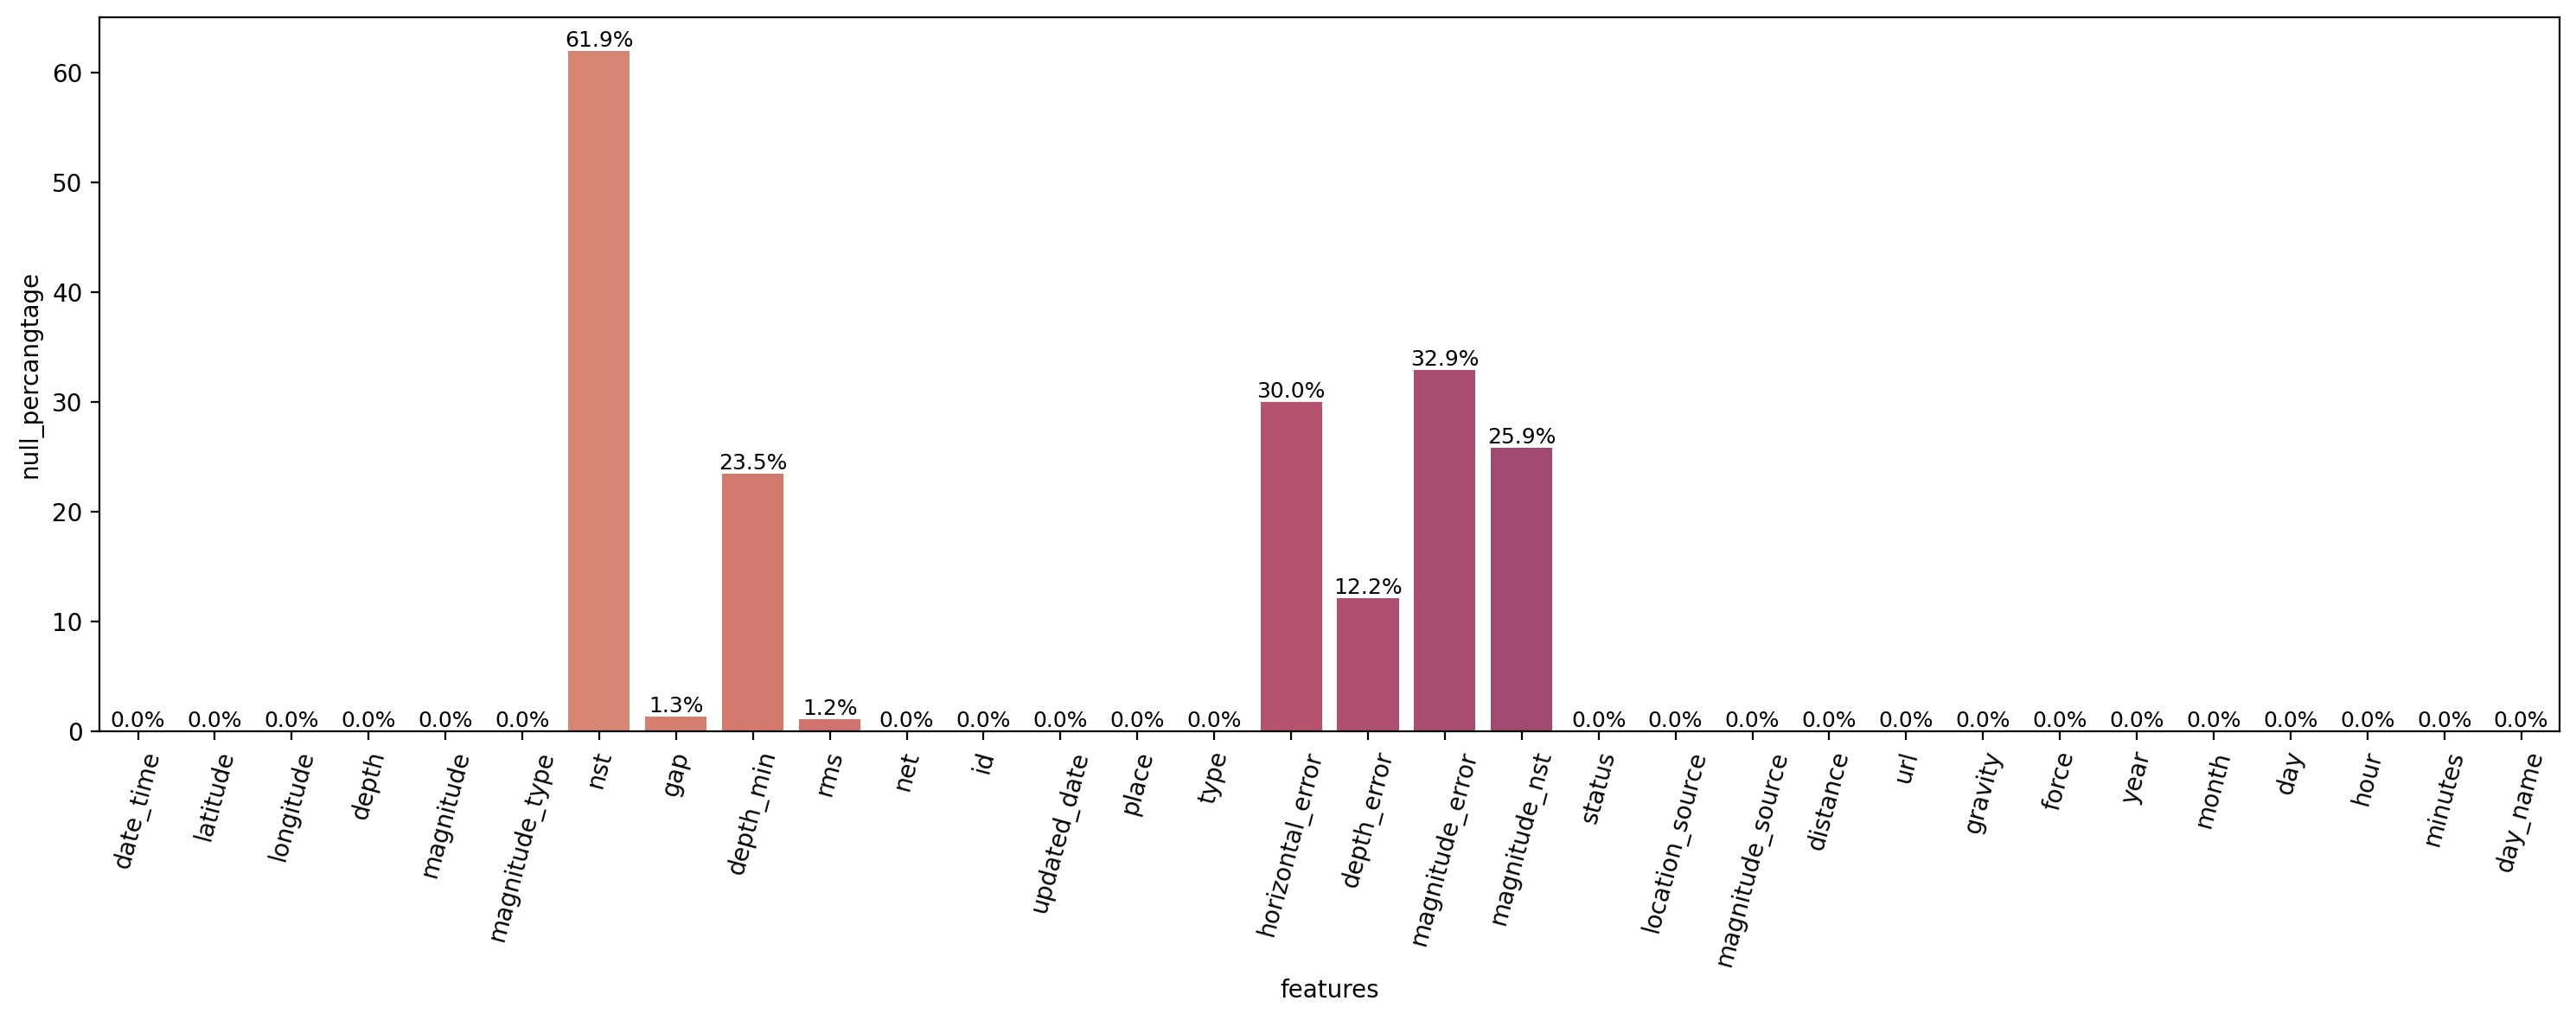

In [18]:
title = 'The percantage of data null in each columns/features in the dataset'
data = pd.DataFrame((earthquake_data.isnull().sum()/ len(earthquake_data))*100).reset_index()
data = data.rename(columns={'index': 'features', 0:'null_percangtage'})
plt.figure(figsize=(15, 6), dpi = 200)
sns.barplot(data=data, x='features', y='null_percangtage', palette=color(len(data)))
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=75)
# plt.title(title)
plt.tight_layout()
plt.show()

#### Since they are many missing values, we need to find the relationship between missing values and Magnitude

Let's plot some diagram for this relationship

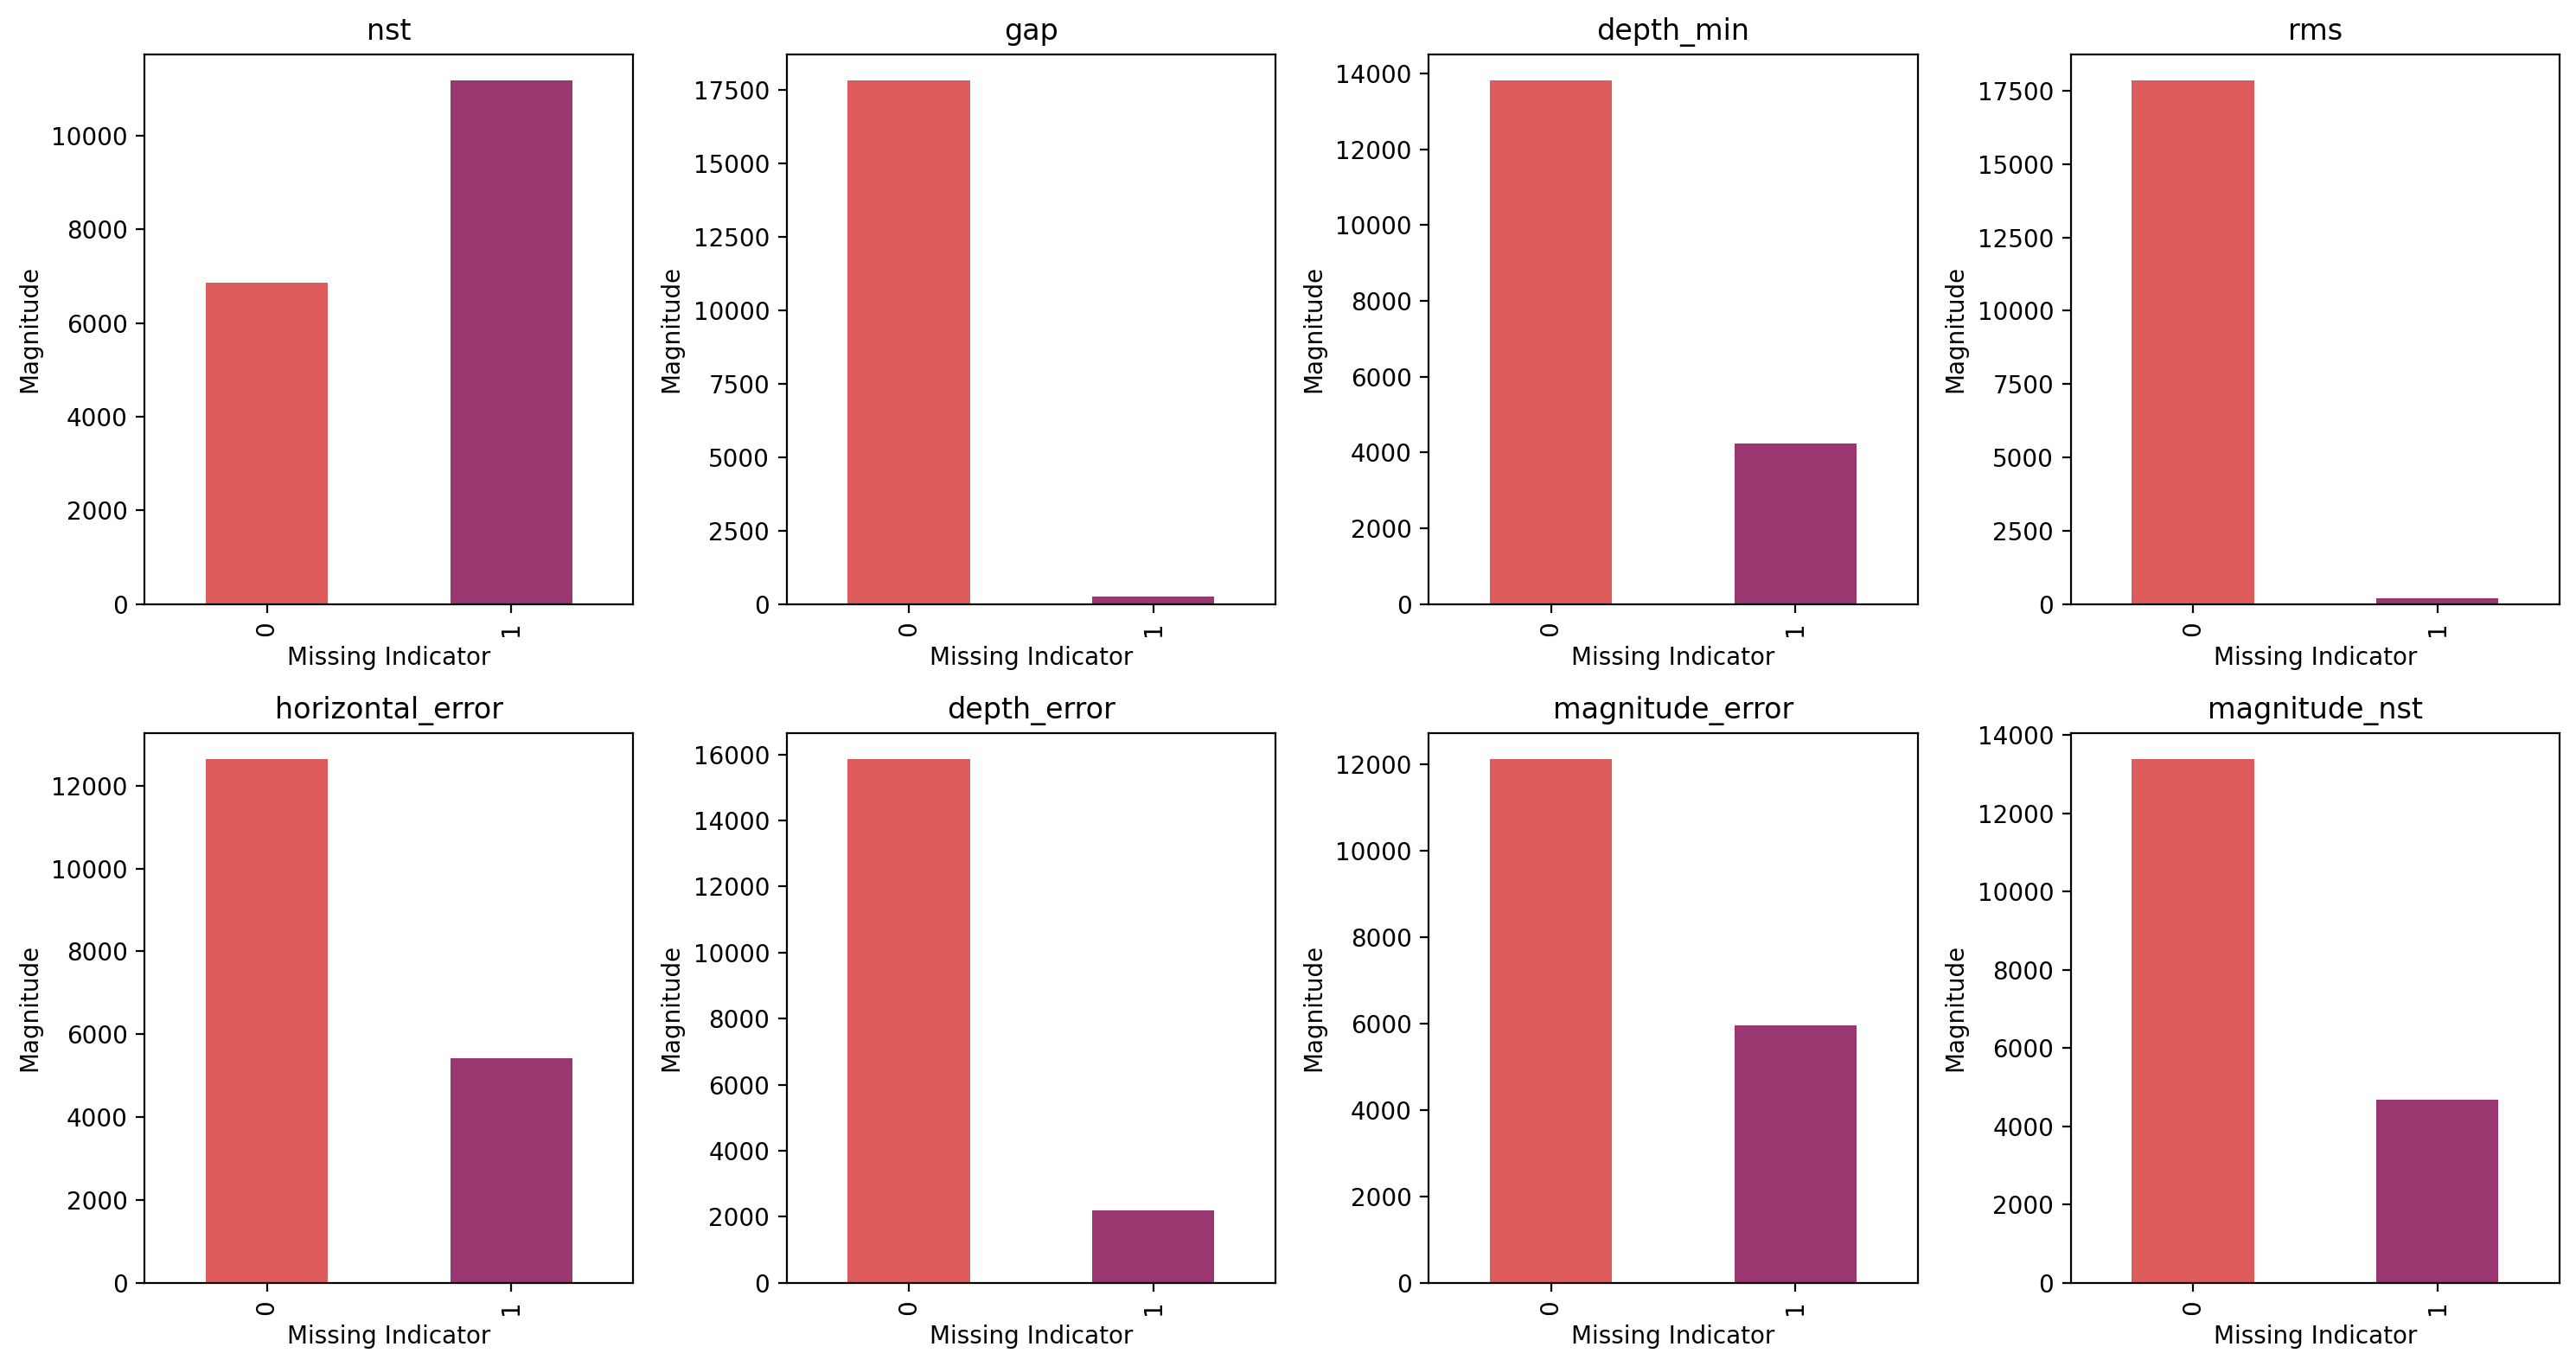

In [19]:
fig_title = "missing and non-missing values count in dataset's features"
num_columns = 2  # Number of plots per row
num_features = len(features_with_na)
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_columns, num_rows , figsize=(15, 8), dpi=200)  # Adjust figure size as needed

axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(features_with_na):
    data = earthquake_data.copy()
    
    # Create a variable indicating 1 if the observation was missing or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Calculate the count of magnitude where the information is missing or present
    median_magnitude = data.groupby(feature)['magnitude'].count()
    # print(median_magnitude)
    
    # Plot the bar chart
    median_magnitude.plot.bar(ax=axes[i], color = color(2))
    axes[i].set_title(feature)
    axes[i].set_xlabel('Missing Indicator')
    axes[i].set_ylabel('Magnitude')

# Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
plt.savefig(f'./images/{fig_title}.png')
plt.tight_layout()
plt.show()

Here With  the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful or will drop the column which we will do in the Feature Engineering section

### 2. Numerical Variables

In [20]:
# list of numerical variables
numerical_features = earthquake_data.select_dtypes(exclude=object).columns.to_list()
print('total number of numberical variables', len(numerical_features))
numerical_features

total number of numberical variables 21


['date_time',
 'latitude',
 'longitude',
 'depth',
 'magnitude',
 'nst',
 'gap',
 'depth_min',
 'rms',
 'horizontal_error',
 'depth_error',
 'magnitude_error',
 'magnitude_nst',
 'distance',
 'gravity',
 'force',
 'year',
 'month',
 'day',
 'hour',
 'minutes']

In [21]:
# visualise the numerical variables
earthquake_data[numerical_features].head()

,date_time,latitude,longitude,depth,magnitude,nst,gap,depth_min,rms,horizontal_error,depth_error,magnitude_error,magnitude_nst,distance,gravity,force,year,month,day,hour,minutes
0,2011-01-01 09:56:58,-26.803,-63.136,576.8,7.00,607.0,18.4,NaN,0.85,NaN,NaN,NaN,NaN,380543,9.818623,2.020842e+20,2011,1,1,9,56
1,2011-01-01 09:59:36,-26.851,-63.217,592.9,5.78,NaN,NaN,NaN,NaN,NaN,25.0,0.4,NaN,380548,9.794050,2.020789e+20,2011,1,1,9,59
2,2011-01-02 09:23:13,-59.414,-24.469,35.0,5.10,52.0,95.5,NaN,1.20,NaN,NaN,NaN,13.0,383580,9.793398,1.988969e+20,2011,1,2,9,23
3,2011-01-02 15:19:31,-4.458,101.428,21.6,5.70,271.0,28.9,NaN,1.08,NaN,3.2,NaN,NaN,384394,9.802458,1.980554e+20,2011,1,2,15,19
4,2011-01-02 20:20:17,-38.355,-73.326,24.0,7.20,397.0,30.1,NaN,1.10,NaN,NaN,NaN,NaN,385093,9.790649,1.973371e+20,2011,1,2,20,20


#### Temporal Variables(Eg: Datetime Variables)

From the Dataset it has 6 date-time variable where year, month, day, hour and minute variables is extracted from date_time. Further analysis will be coverd in featured engineering section

In [22]:
# list of variables that contain date & time information
datetime_feature = [feature for feature in numerical_features if 'year' in feature or 
                    'month' in feature or 
                    'hour' in feature or
                    'minutes' in feature
                   ]

datetime_feature

['year', 'month', 'hour', 'minutes']

In [23]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(earthquake_data[feature].unique())<25 and feature not in datetime_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


### There is No Discrete Variable in dataset

### 3.Distribution of the Numerical Variables

#### Continious Variable

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+datetime_feature]
print("Continuous feature Count {}".format(continuous_feature))

Continuous feature Count ['date_time', 'latitude', 'longitude', 'depth', 'magnitude', 'nst', 'gap', 'depth_min', 'rms', 'horizontal_error', 'depth_error', 'magnitude_error', 'magnitude_nst', 'distance', 'gravity', 'force', 'day']


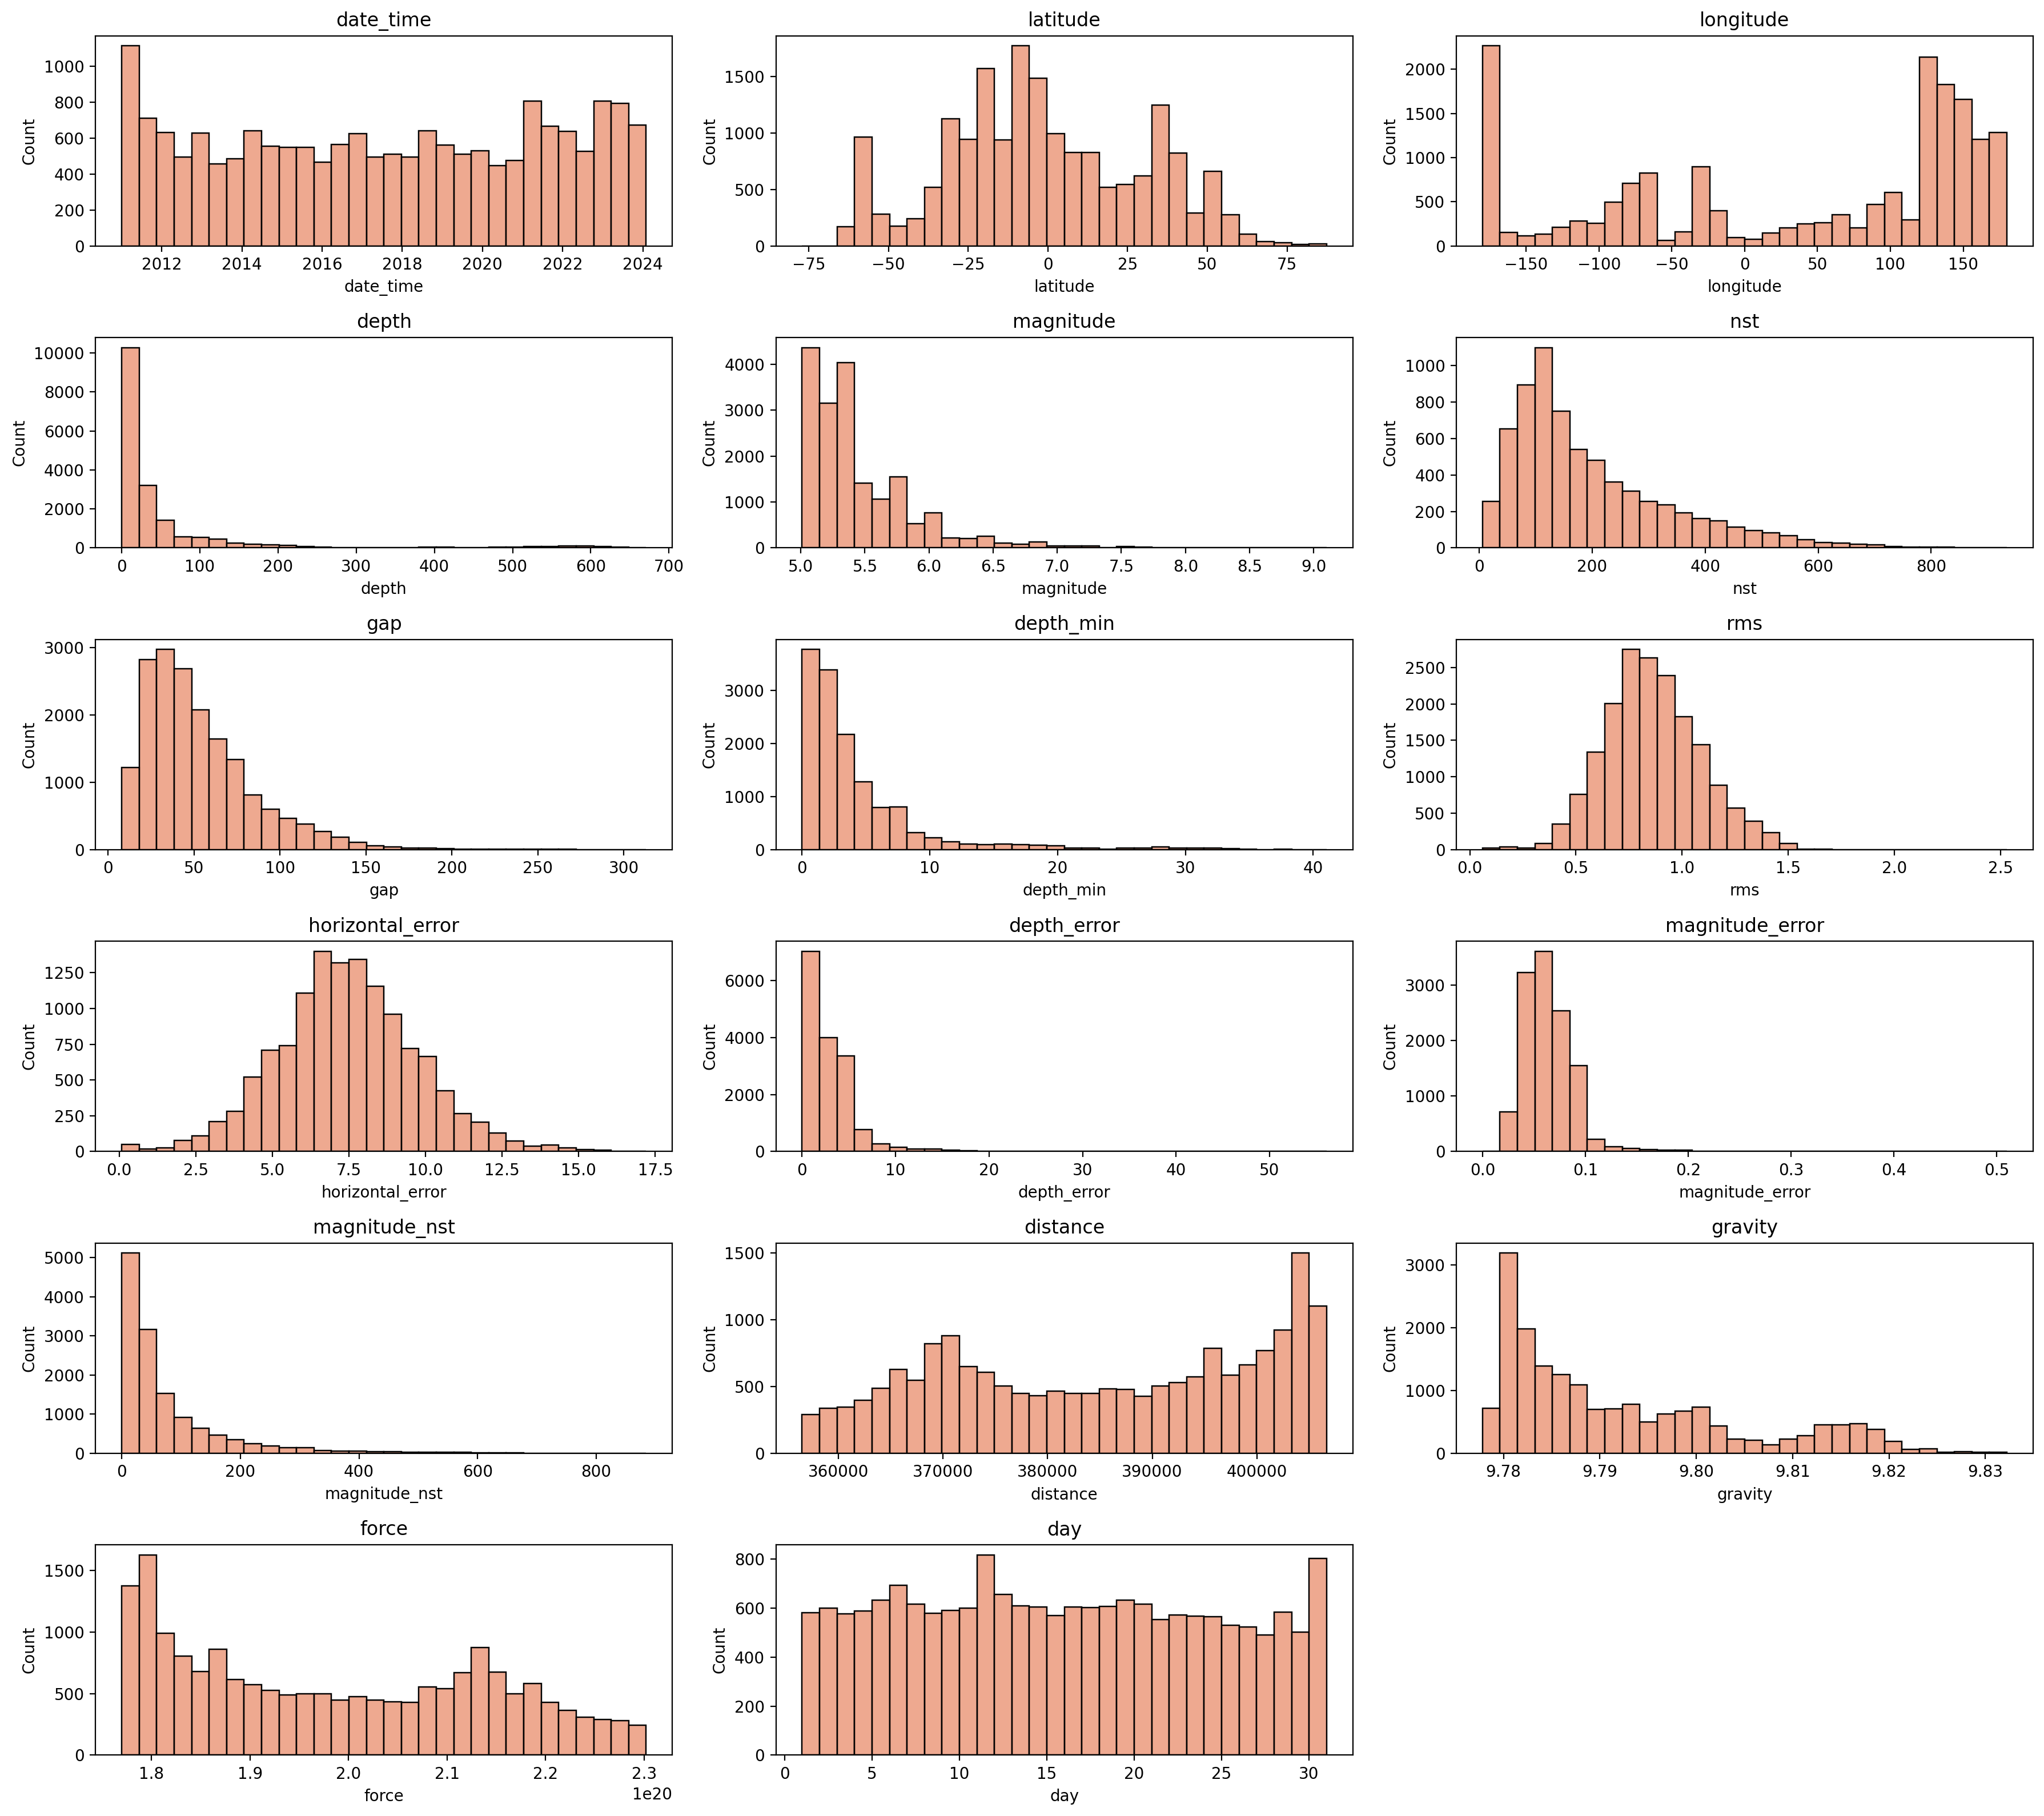

In [25]:
fig_title='Distribution of the Numerical Variables'

fig, axes = plt.subplots(6, 3 , figsize=(18, 16), dpi=200)  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(continuous_feature):
    data = earthquake_data.copy()
    ax = axes[i]
    # data[feature].hist(bins=25, ax=ax,)
    sns.histplot(data[feature], bins = 30, ax = ax, palette=sns.set_palette('flare'), hue=None)
    ax.set_xlabel(feature) 
    ax.set_ylabel("Count")
    ax.set_title(feature)
    # Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.savefig(f'./images/{fig_title}.png')
fig.show()

### Use Log Transformation to form normal distribution

In [26]:
# Get only feature having positive value and not datetime datatype
# Define a function to filter positive and non-datetime features
def get_positive_continuous_features(df):
    continuous_features = []
    for feature in df.columns:
        if pd.api.types.is_numeric_dtype(df[feature]) and not pd.api.types.is_datetime64_any_dtype(df[feature]):
            if df[feature].min() > 0:
                continuous_features.append(feature)
    return continuous_features

positive_continuous_features = get_positive_continuous_features(earthquake_data)

print("Positive continuous features:", positive_continuous_features)

Positive continuous features: ['magnitude', 'nst', 'gap', 'rms', 'horizontal_error', 'distance', 'gravity', 'force', 'year', 'month', 'day']


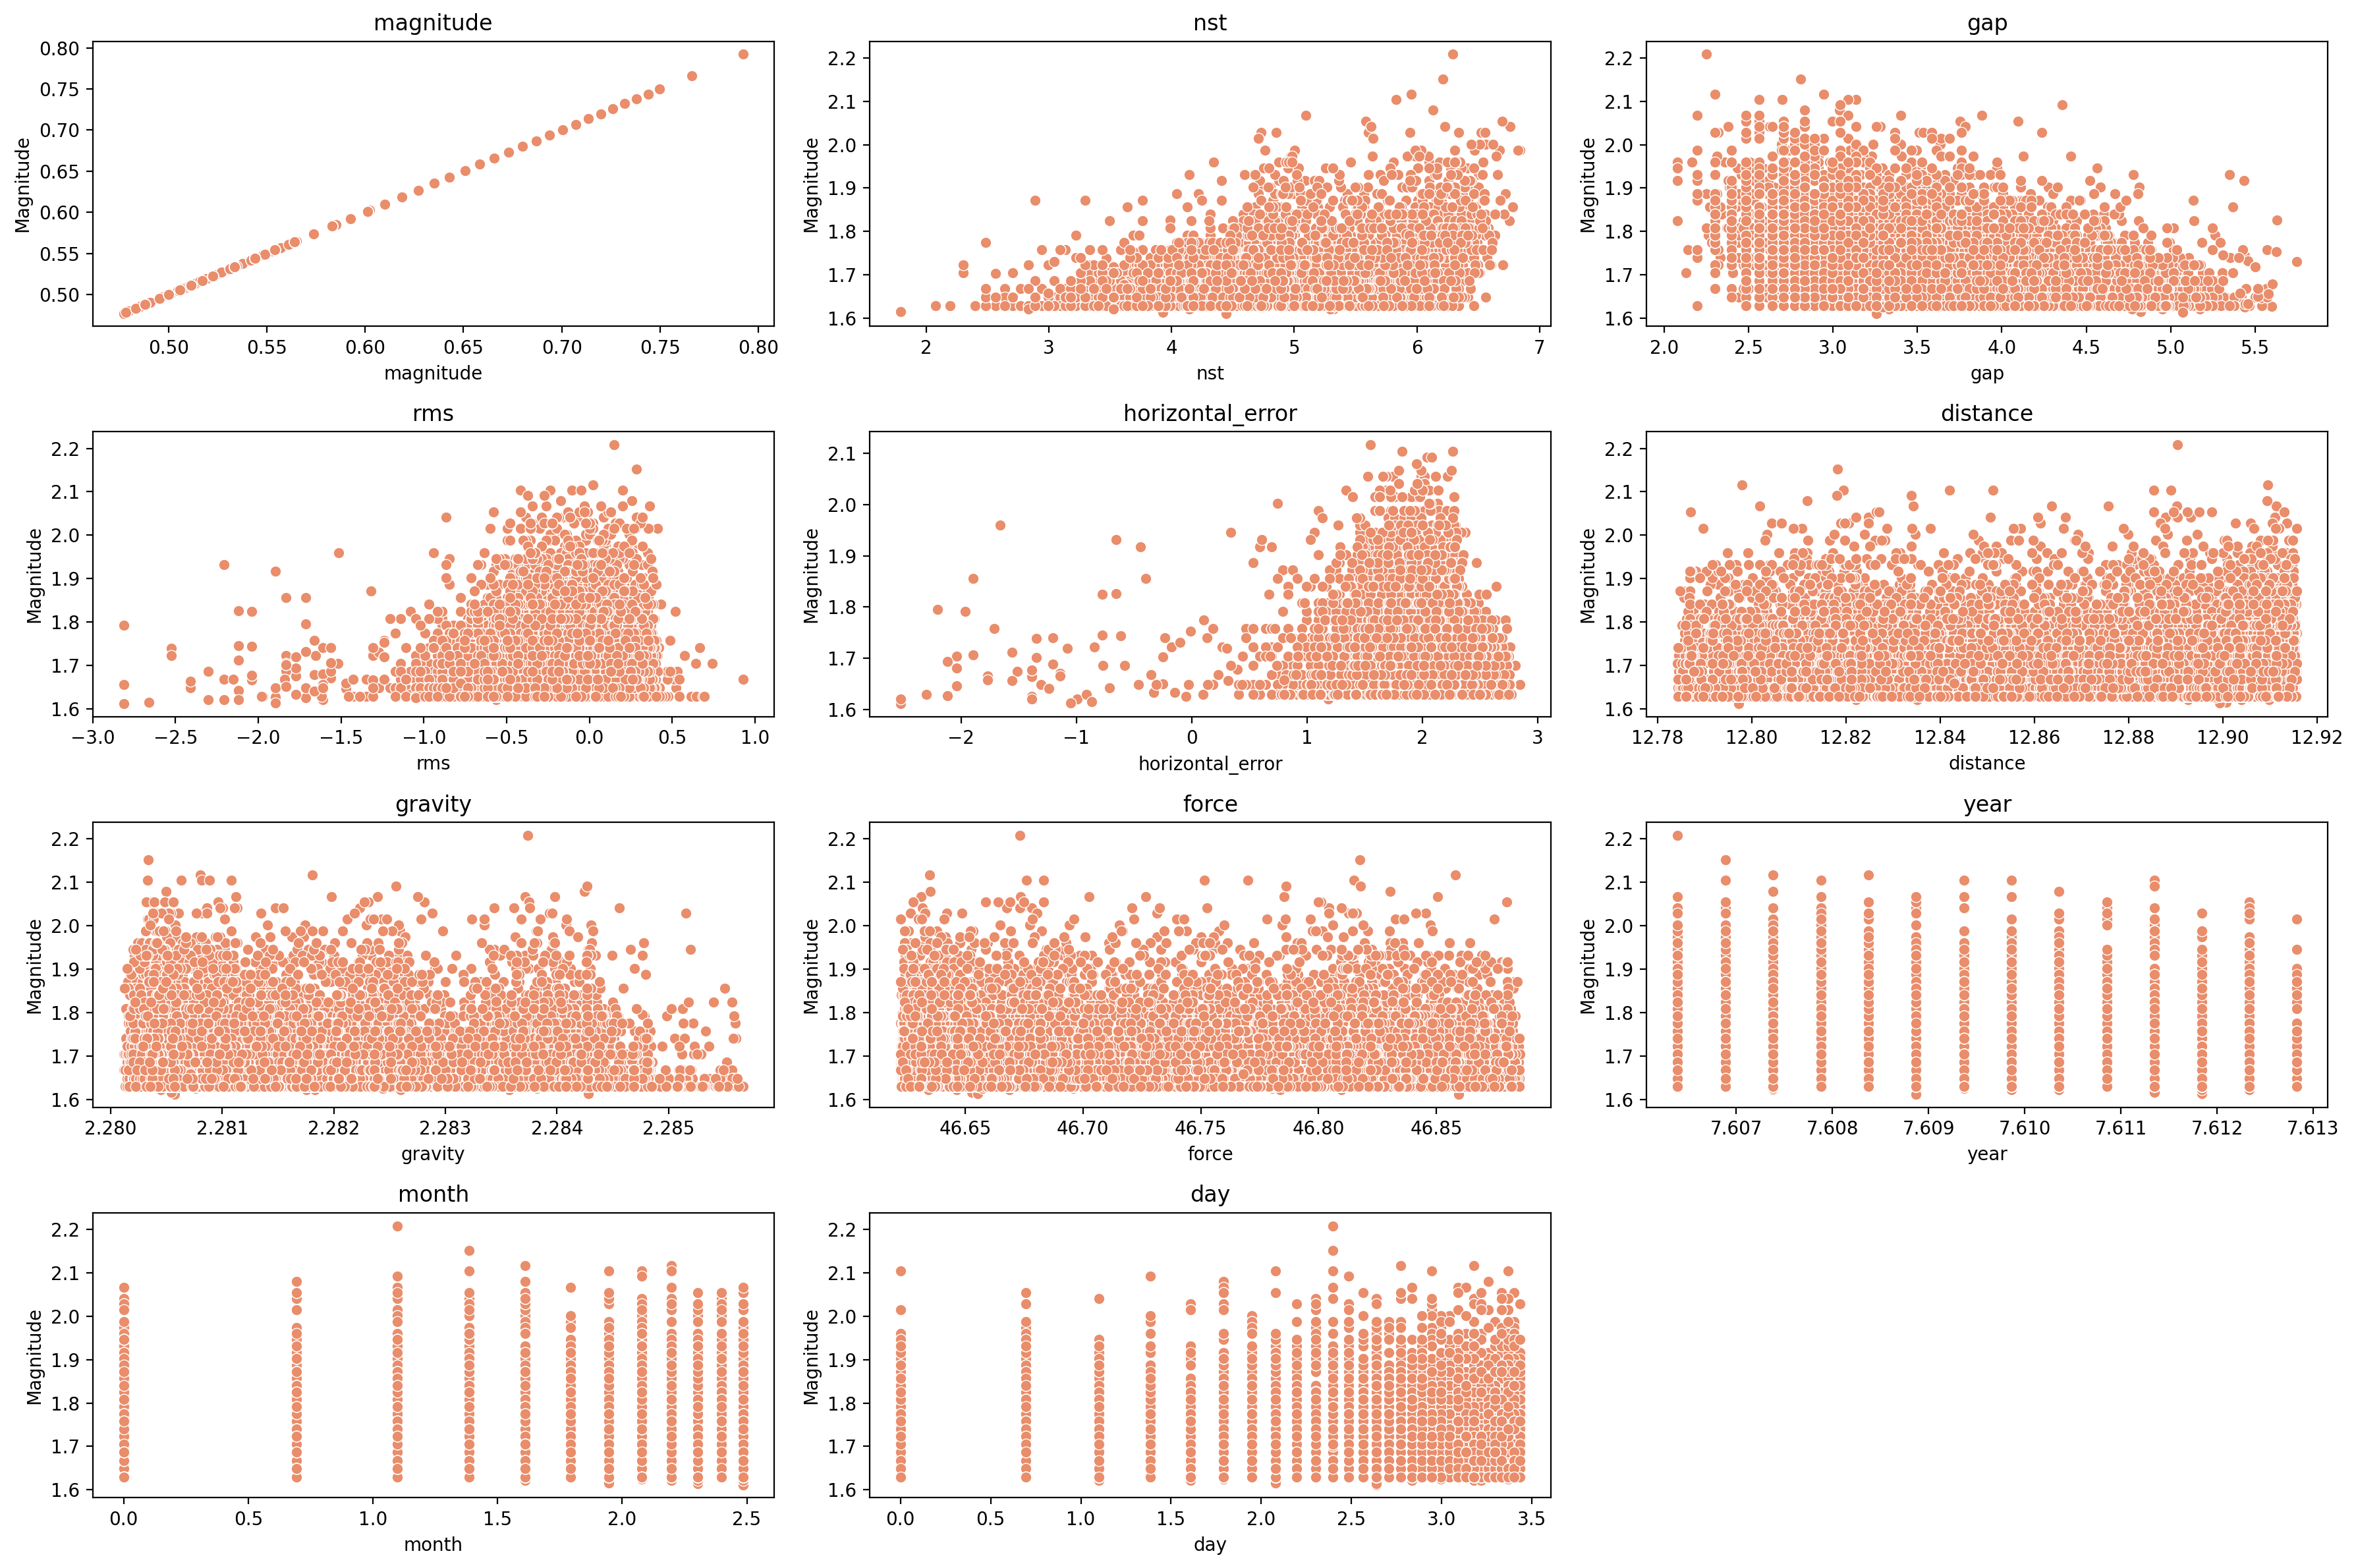

In [27]:
fig_title = 'after transformation dataset'
num_features = len(positive_continuous_features)
num_columns = 2  # Number of plots per row
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(4, 3 , figsize=(18, 12), dpi=200) # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(positive_continuous_features):
        data = earthquake_data.copy()
        
        if 0 in data[feature].unique():
            print(f"Skipping feature '{feature}' due to zero values.")
            continue

        # Apply log transformation
        data[feature] = np.log(data[feature])
        data['magnitude'] = np.log(data['magnitude'])
        
        ax = axes[i]
        # ax.scatter(data[feature], data['magnitude'])
        sns.scatterplot(data = data, x =feature, y= 'magnitude', ax = ax, palette=sns.set_palette('flare'))
        ax.set_xlabel(feature)
        ax.set_ylabel("Magnitude")
        ax.set_title(feature)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.savefig(f'./images/{fig_title}.png')
fig.show()

#### From above scatter plot its shows Non-linear relationship between Dependent(Traget) variable Magnitude in Y-axis and Independent Variable in X-axis

### 3.Outliers


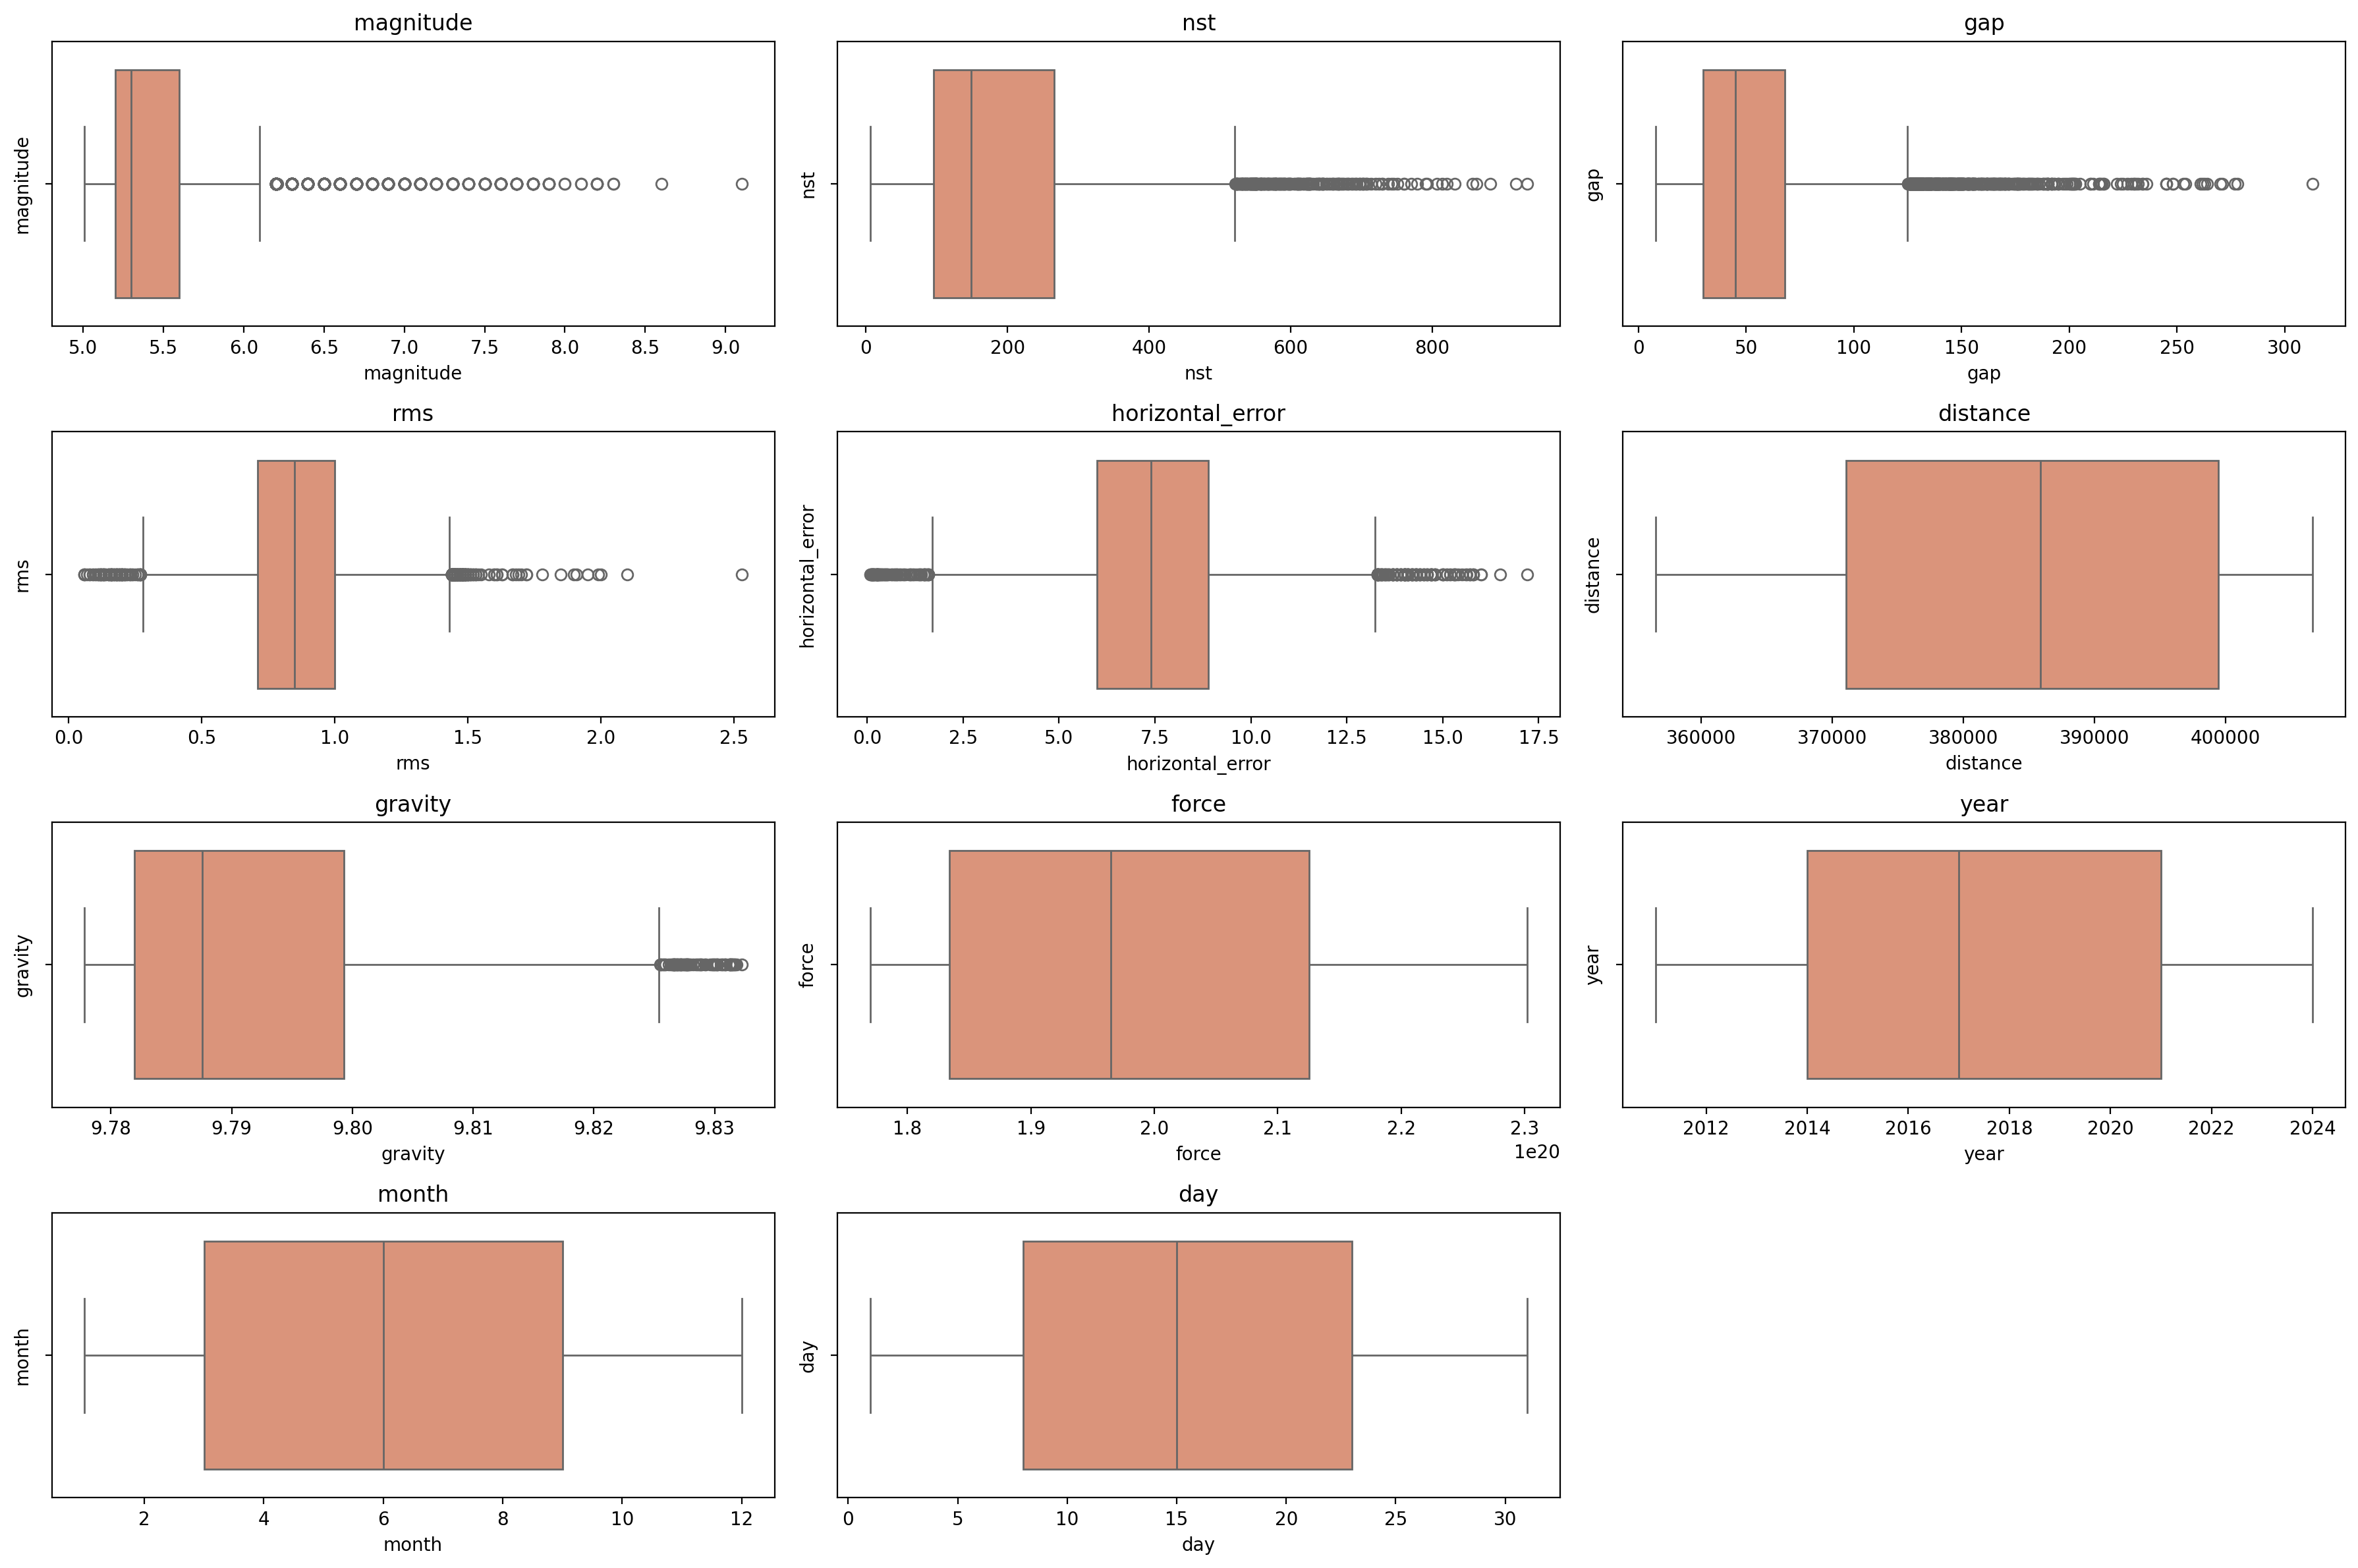

In [28]:
fig_title = 'outlaiers plot'
num_features = len(positive_continuous_features)
num_columns = 2  # Number of plots per row
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate the number of rows needed
# Define the color palette using seaborn and convert to Plotly format

fig, axes = plt.subplots(4, 3 , figsize=(18, 12), dpi=200)  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(positive_continuous_features):
        data_copy = earthquake_data.copy()
        
        if 0 in data_copy[feature].unique():
            print(f"Skipping feature '{feature}' due to zero values.")
            continue

        # data_copy[feature] = np.log(data_copy[feature])
        ax = axes[i]
        sns.boxplot(data_copy, x = feature, ax = ax)
        # data_copy.boxplot(column=feature, ax=ax,)
        ax.set_ylabel(feature)
        ax.set_title(feature)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.savefig(f'./images/{fig_title}.png')
fig.show()

In [34]:
 # Calculate the 75th and 25th percentiles of the 'magnitude' column
q75, q25 = np.percentile(earthquake_data['magnitude'], [75, 25])

# Calculate the Interquartile Range (IQR)
IQR = q75 - q25

# Determine the lower and upper limits for outliers
lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

# Print the lower and upper limits
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Filter the DataFrame to remove values outside the range (remove outliers)
earthquake_data = earthquake_data[(earthquake_data['magnitude'] >= lower_limit) & (earthquake_data['magnitude'] <= upper_limit)]

# Print the filtered DataFrame
print("Filtered DataFrame:")
# print(df_filtered)

Lower limit: 4.600000000000001
Upper limit: 6.199999999999999
Filtered DataFrame:


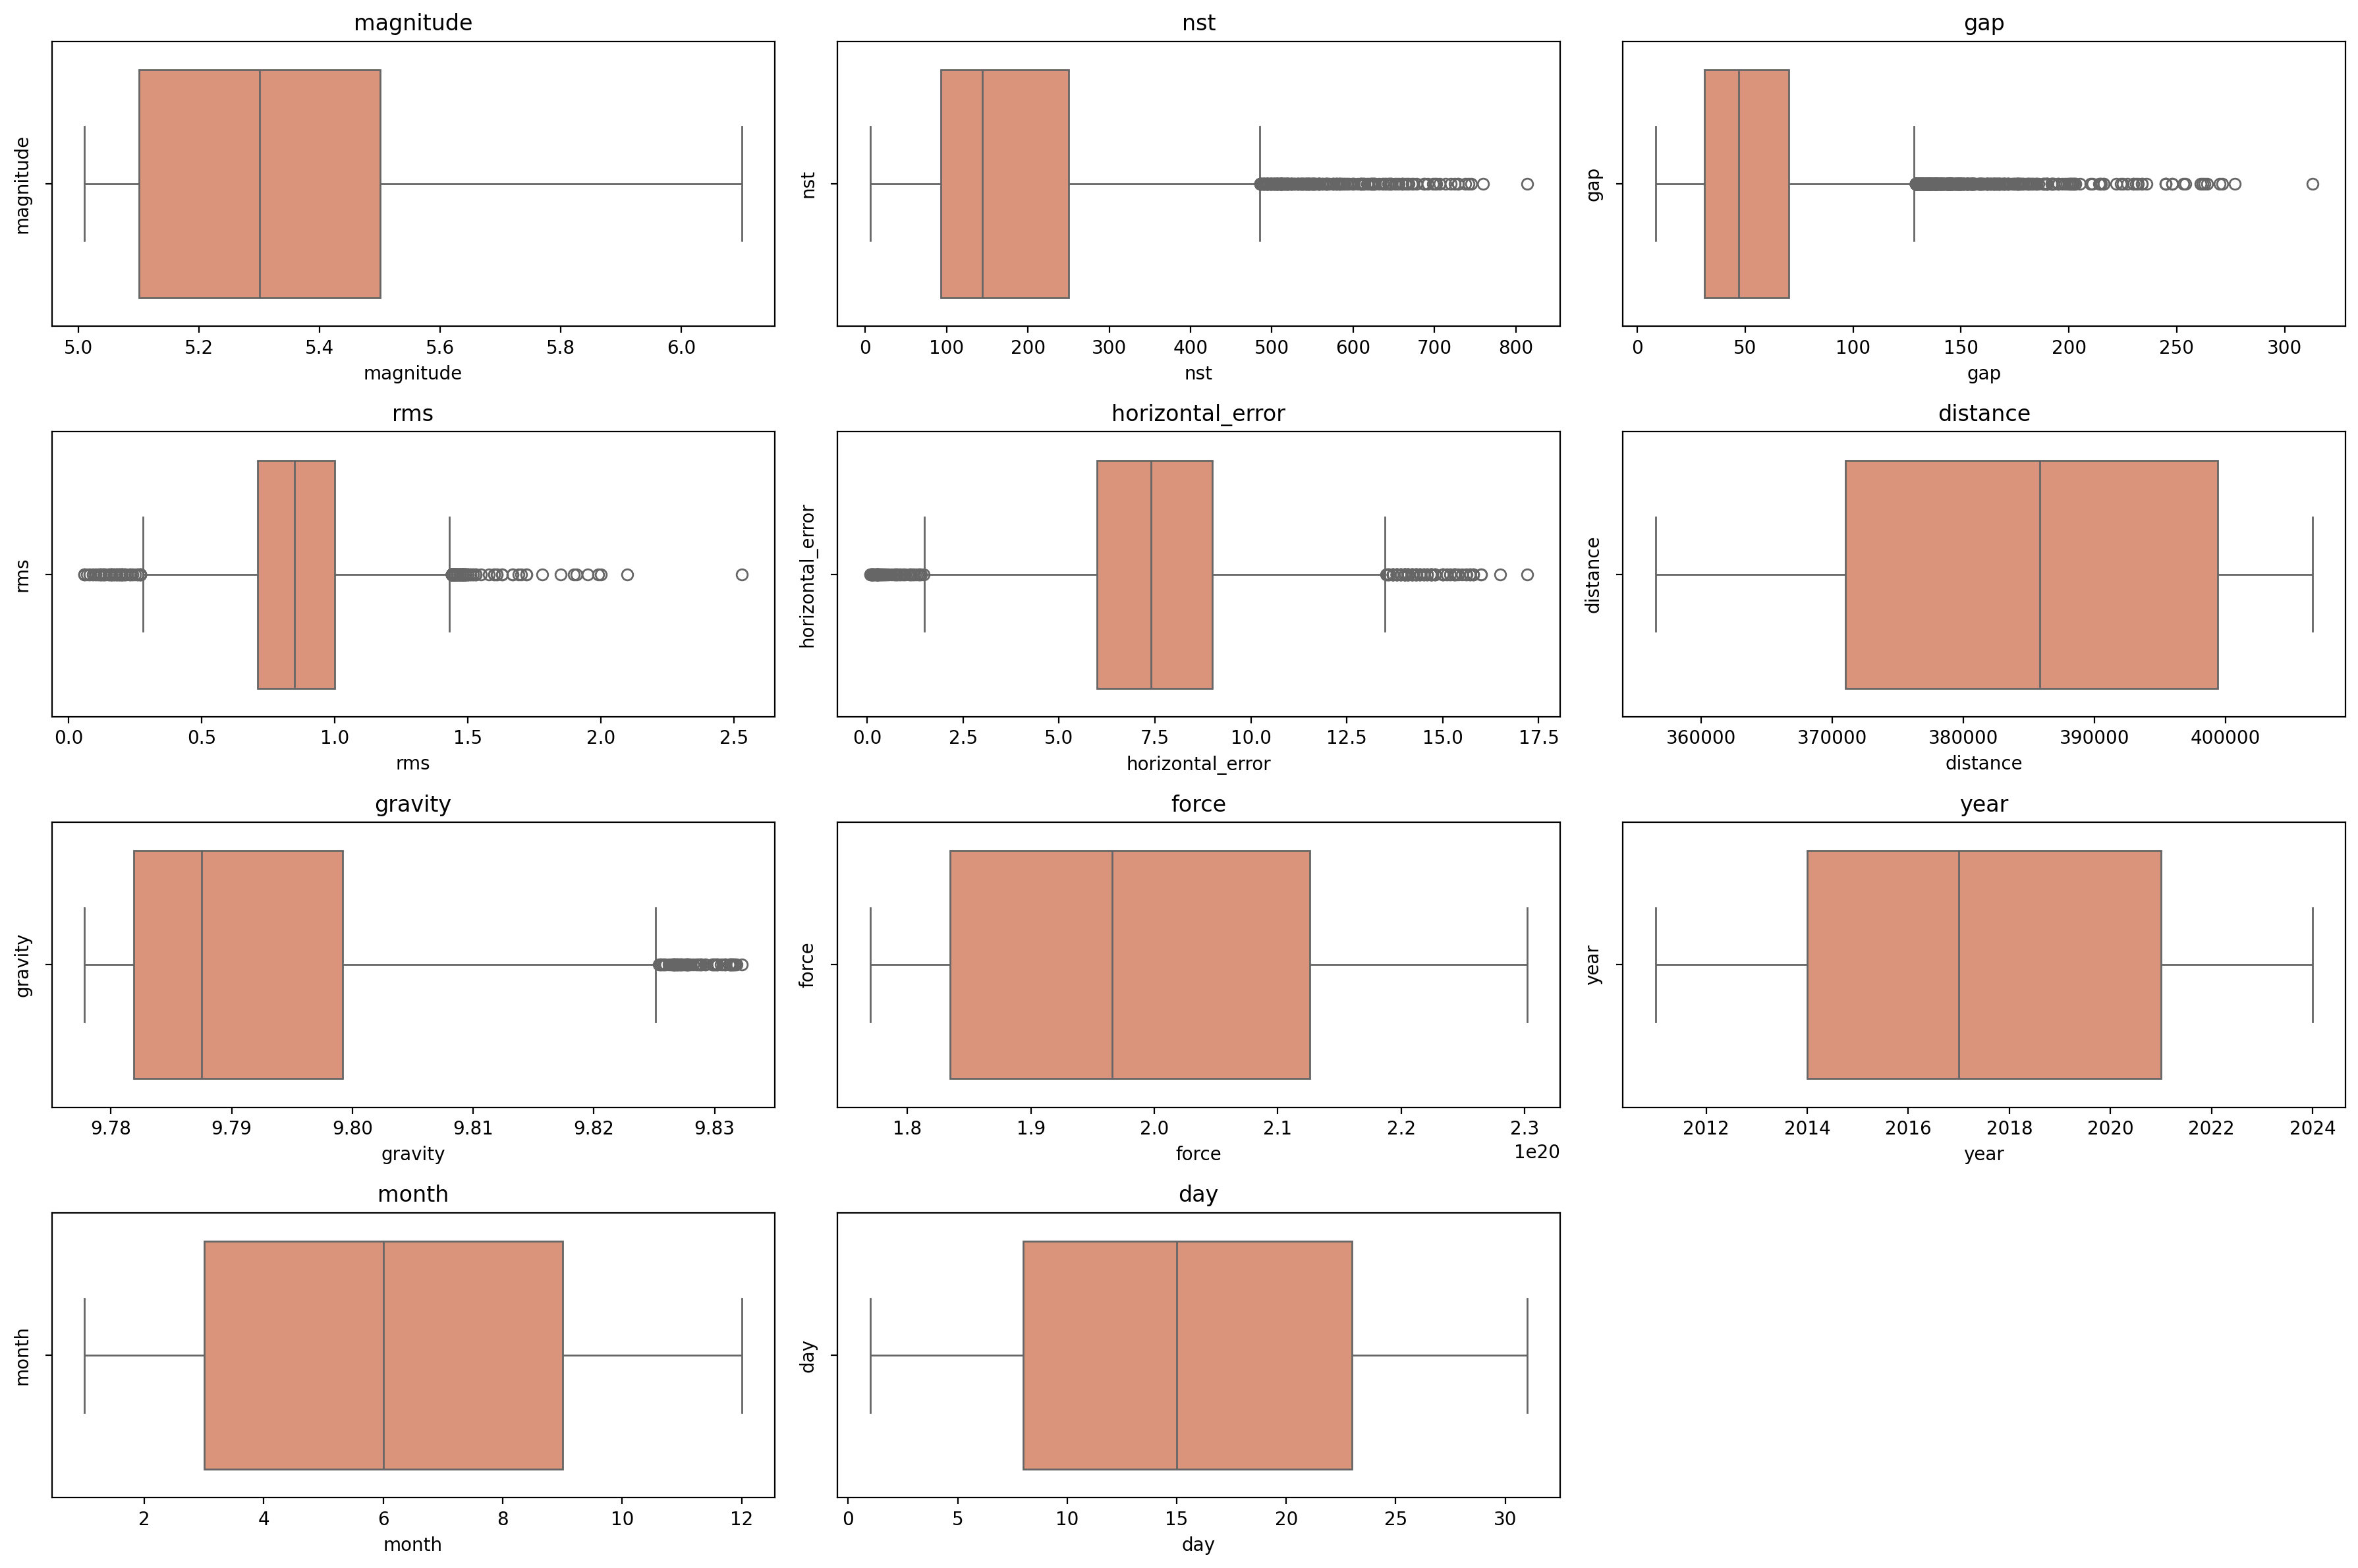

In [35]:
# outliers removing
fig_title = 'outlaiers plot'
num_features = len(positive_continuous_features)
num_columns = 2  # Number of plots per row
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate the number of rows needed
# Define the color palette using seaborn and convert to Plotly format

fig, axes = plt.subplots(4, 3 , figsize=(18, 12), dpi=200)  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(positive_continuous_features):
        data_copy = earthquake_data.copy()
        
        if 0 in data_copy[feature].unique():
            print(f"Skipping feature '{feature}' due to zero values.")
            continue

        # data_copy[feature] = np.log(data_copy[feature])
        ax = axes[i]
        sns.boxplot(data_copy, x = feature, ax = ax)
        # data_copy.boxplot(column=feature, ax=ax,)
        ax.set_ylabel(feature)
        ax.set_title(feature)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.savefig(f'./images/{fig_title}.png')
fig.show()

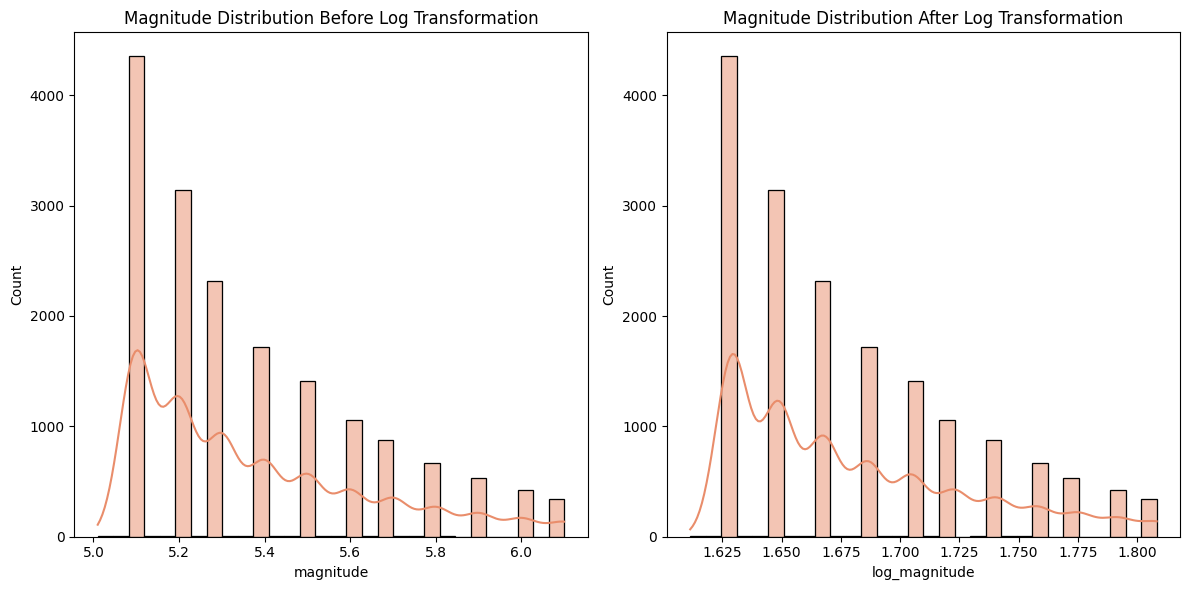

In [36]:
# Apply log transformation to the magnitude column
earthquake_data['log_magnitude'] = np.log(earthquake_data['magnitude'])



# Before log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(earthquake_data['magnitude'], bins=30, kde=True)
plt.title('Magnitude Distribution Before Log Transformation')

# After log transformation
plt.subplot(1, 2, 2)
sns.histplot(earthquake_data['log_magnitude'], bins=30, kde=True)
plt.title('Magnitude Distribution After Log Transformation')

plt.tight_layout()
plt.show()

### 4. Categorical Features

In [ ]:
categorical_features=[feature for feature in earthquake_data.columns if earthquake_data[feature].dtypes=='O']
categorical_features

In [ ]:
earthquake_data[categorical_features].head()

#### 5. Cardinality of Categorical Variable

In [ ]:
categorical_feature = []
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(earthquake_data[feature].unique())))
    if len(earthquake_data[feature].unique()) < 25 and len(earthquake_data[feature].unique()) > 1:
        categorical_feature.append(feature)
    

In [ ]:
fig_title='cardinality of cateforical variable'
num_columns = 2  # Number of plots per row
num_features = len(categorical_feature)
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(2, 2 , figsize=(15, 8), dpi=200)   # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(categorical_feature):
    data = earthquake_data.copy()
    # if len(earthquake_data[feature].unique()) < 25:
    # Calculate the count of magnitude where the information is missing or present
    cat_feature = data.groupby(feature)['magnitude'].count()
    
    # Plot the bar chart
    # cat_feature.plot.bar(ax=axes[i])
    sns.barplot(cat_feature, ax = axes[i], palette=color(len(cat_feature)), hue=None)
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature,)
    axes[i].set_ylabel('Magnitude')
    axes[i].tick_params(axis='x', labelrotation=45)


# Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(f'./images/{fig_title}.png')
plt.show()

### 7.Relationship between independent and dependent feature(magnitude)

#### Earthquake record in from 2011 to 2024 throughout the world

In [ ]:
# Define the color palette using seaborn and convert to Plotly format
color_palette = sns.color_palette('flare', as_cmap=True).colors
color_palette_plotly = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b in color_palette]

fig = px.scatter_geo(data_frame=earthquake_data, 
                     lat="latitude", lon="longitude",
                     scope="world",
                     color="magnitude",
                     hover_name="magnitude",
                     animation_frame="year",
                     color_continuous_scale=color_palette_plotly,  # Use the converted Seaborn palette
                     width=900, height=900,
                     title="Earthquake record by year throughout the world")

fig.update_geos(projection_type="orthographic", resolution=110)

# Update the background color using the first color from the palette for demonstration
# fig.update_layout(
#     plot_bgcolor='rgb(30, 30, 30)',  # Example color for background
#     paper_bgcolor='rgb(30, 30, 30)',  # Example color for background
# )
fig.write_html("./images/testfile.html") 
fig.show()

#### A kernel density estimate of magnitude, depth, distance by using pair plot and kind kde. 

In [ ]:
# Define the color palette for the pair plot
fig = plt.figure(figsize=(15, 12), dpi = 200)
palette = sns.color_palette('flare', n_colors=6)

# Create the pair plot with KDE
sns.pairplot(earthquake_data[['magnitude', 'depth', 'distance', 'magnitude_type', 'force', 'gravity']],
             palette=palette,
             corner=True,
             hue='magnitude_type',
             kind='kde')

# Save the plot
plt.savefig('./images/pairplot.png', dpi=200)

# Display the plot
plt.show()

#### Earthquake magnitude between 5 - 9 with respect to distance, force, gravity from 2011 to 2024

In [ ]:

def show_gmfd(df, title):
    data = df[[ 'force', 'distance','gravity']]
    
    # Counting 'yes' and 'no' for each column
    counts = data.apply(pd.Series.value_counts)
    colors = sns.color_palette("flare", n_colors=2)
    # Plotting count plots (bar plots)
    fig, axes = plt.subplots(3, 1, figsize=(15, 8), dpi = 200)
    axes = axes.flatten()
    
    for i, col in enumerate(data.columns):
        ax = axes[i]
        sns.lineplot(ax = ax, x= df['magnitude'], y=col, data = earthquake_data, color ='chocolate' , marker = 'o',mec='purple', label='magnitude')
        ax.set_xlabel('magnitude')
        ax.set_ylabel(col)
        ax.margins( 0.2,tight=True)
        # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    
    plt.tight_layout()
    plt.savefig(f'./images/{title}.png')

    plt.show()
    

fig_title = 'gravity_magnitude_force_distance'
show_gmfd(earthquake_data, fig_title)

#### Relation between force distance, gravity, magnitude, magnitude type

In [ ]:
def show_gm_tfd(df, title):
    data = df[[ 'force', 'distance', 'magnitude']]
    
    # Counting 'yes' and 'no' for each column
    counts = data.apply(pd.Series.value_counts)
    colors = sns.color_palette("flare", n_colors=2)
    # Plotting count plots (bar plots)
    fig, axes = plt.subplots(3, 1, figsize=(15, 8), dpi = 200)
    axes = axes.flatten()
    
    for i, col in enumerate(data.columns):
        ax = axes[i]
        sns.scatterplot(ax = ax, y= df['gravity'], x=col, data = data, palette=sns.color_palette('flare'), hue=df['magnitude_type'])
        ax.set_xlabel(col)
        ax.set_ylabel('gravity')
        ax.margins( 0.2,tight=True)
        ax.get_legend().remove()
        # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    
    plt.tight_layout()
    plt.savefig(f'./images/{title}.png')
    # plt.legend('')
    plt.show()
    

fig_title = 'gravity_magnitude_force_distance'
show_gm_tfd(earthquake_data, fig_title)

In [ ]:
import folium
from folium.plugins import MarkerCluster


In [ ]:
# Create a map centered at latitude 0, longitude 0 with a zoom level of 2
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a marker cluster
marker_cluster = MarkerCluster(name="Earthquake Clusters").add_to(m)

# Iterate through each row in the DataFrame and add a CircleMarker to the cluster
for row in earthquake_data.itertuples():
    popup_info = (
        f"Date and Time: {row.date_time}<br>"
        f"Latitude: {row.latitude}<br>"
        f"Longitude: {row.longitude}<br>"
        f"Depth: {row.depth}<br>"
        f"Magnitude: {row.magnitude}<br>"
        f"Magnitude Type: {row.magnitude_type}<br>"
        f"Force: {row.force}<br>"
        f"Location: {row.place}<br>"
        f"Distance: {row.distance}<br>"
        f"URL: <a href='{row.url}' target='_blank'>More Info</a>"
    )
    
    # Define the color and radius based on magnitude
    color = 'red' if row.magnitude >= 6 else 'blue'
    radius = 5 + (row.magnitude * 2)  # Example radius calculation

    folium.CircleMarker(
        location=[row.latitude, row.longitude],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(popup_info, max_width=300),
        tooltip=f"Force: {row.force}"
    ).add_to(marker_cluster)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save("earthquake_map.html")

# To display the map in Jupyter Notebook, use:
m

In [ ]:
cor = earthquake_data[continuous_feature].corr()
plt.figure(figsize=(15, 8), dpi = 200)
sns.heatmap(cor, annot=True, cmap=sns.color_palette('flare'))
plt.tight_layout()

In [ ]:
# earthquake_data.to_csv('../dataset/final_dataset/raw_dataset_eda.csv', index = False)
# earthquake_data

#### hypothisis testing

In [ ]:
earthquake_data

In [ ]:
import pandas as pd
from scipy import stats

def hypothesis_testing_gravity_force_distance(data, hypothesized_mean, alpha=0.05):
    # Extract the relevant data
    gravity_force_distance = data['magnitude'] / data['force']
    
    # Calculate sample mean and standard deviation
    sample_mean = gravity_force_distance.mean()
    sample_std = gravity_force_distance.std()
    sample_size = len(gravity_force_distance)
    
    # Calculate t-statistic
    t_statistic = (sample_mean - hypothesized_mean) / (sample_std / sample_size ** 0.5)
    
    # Calculate degrees of freedom
    degrees_of_freedom = sample_size - 1
    
    # Calculate p-value (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))
    
    # Calculate margin of error
    margin_of_error = stats.t.ppf(1 - alpha / 2, df=degrees_of_freedom) * (sample_std / sample_size ** 0.5)
    
    # Calculate confidence interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    # Print results
    print(f"t-statistic: {t_statistic}")
    print(f"Critical t-Value: {stats.t.ppf(1 - alpha / 2, degrees_of_freedom)}")
    print(f"p-Value: {p_value}")
    print(f"Confidence Interval: {confidence_interval}")
    
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in the gravity force distance.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in the gravity force distance.")

# Load the dataset
data = earthquake_data

# Hypothesized mean (you need to define this based on your specific hypothesis)
hypothesized_mean = 1.8e+20  # Example value, replace with actual hypothesized mean

# Perform hypothesis testing
hypothesis_testing_gravity_force_distance(data, hypothesized_mean)
